# Lab Assignment 4 -- Data and Pandas
In this lab, you will complete a series of exercises related to the lecture material on data and Pandas using some real datasets. Each exercise will focus around a single dataset and contain multiple steps.

In [19]:
# We import the libraries you will need
import math
import pandas as pd

## Exercise 1 -- Unemployment Data
Below, we load in data on Unemployment in the United States at the State level.

In [20]:
# Do Not Edit
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp = pd.read_csv(url, parse_dates=["Date"])

## Exercise 1a -- Displaying Data
Complete the following steps:
- In two cells below, display the top 7 rows  and the bottom 3 rows of `unemp`.
- In the third cell, change `unemp` so its column names are strictly lowercase
- Display the resulting DataFrame by calling `unemp` at the bottomg of the third cell.

From a "tidy" perspective, what is an observation in this data? Explain why. Answer in the Markdown cell below.

In [21]:
## Exercise 1a -- Top 7
print(unemp.head(7))

        Date        state  LaborForce  UnemploymentRate
0 2000-01-01      Alabama   2142945.0               4.7
1 2000-01-01       Alaska    319059.0               6.3
2 2000-01-01      Arizona   2499980.0               4.1
3 2000-01-01     Arkansas   1264619.0               4.4
4 2000-01-01   California  16680246.0               5.0
5 2000-01-01     Colorado   2354671.0               2.8
6 2000-01-01  Connecticut   1768421.0               2.8


In [22]:
## Exercise 1a -- Bottom 3
print(unemp.tail(3))

            Date          state  LaborForce  UnemploymentRate
10797 2017-12-01  West Virginia    781852.0               5.4
10798 2017-12-01      Wisconsin   3158257.0               3.2
10799 2017-12-01        Wyoming    292305.0               4.1


In [23]:
# Exercise 1a -- Rename Columns
unemp.columns = [col.lower() for col in unemp.columns]
print(unemp)

            date          state  laborforce  unemploymentrate
0     2000-01-01        Alabama   2142945.0               4.7
1     2000-01-01         Alaska    319059.0               6.3
2     2000-01-01        Arizona   2499980.0               4.1
3     2000-01-01       Arkansas   1264619.0               4.4
4     2000-01-01     California  16680246.0               5.0
...          ...            ...         ...               ...
10795 2017-12-01       Virginia   4318483.0               3.6
10796 2017-12-01     Washington   3754871.0               4.7
10797 2017-12-01  West Virginia    781852.0               5.4
10798 2017-12-01      Wisconsin   3158257.0               3.2
10799 2017-12-01        Wyoming    292305.0               4.1

[10800 rows x 4 columns]


### Response to Exercise 1a
From a "tidy" perspective, an observation in this data is a single row that represents the unemployment rate for a specific state on a specific date. Each row is a unique combination of a date, state, and unemployment rate, making it an individual observation.

## Exercise 1b -- Creating Variables & Index Setting
Complete the following steps:
- Create a column in `unemp` called "year" that is equal to the year of the date.
- Change the index of `unemp` so that the index (or indices) reflect the observational units.
- Display the indices.  

In the Markdown cell below, address the following prompts:
1. How many indices are there?
2. Why are there this many indices? Write an equation that explains it.
3. Is one of your indices a `DateTimeIndex` object?

In [24]:
# Exercise 1b Code
unemp['year'] = unemp['date'].dt.year

In [25]:
unemp.set_index(['state', 'date'], inplace=True)
indices = unemp.index
print(indices)

MultiIndex([(      'Alabama', '2000-01-01'),
            (       'Alaska', '2000-01-01'),
            (      'Arizona', '2000-01-01'),
            (     'Arkansas', '2000-01-01'),
            (   'California', '2000-01-01'),
            (     'Colorado', '2000-01-01'),
            (  'Connecticut', '2000-01-01'),
            (     'Delaware', '2000-01-01'),
            (      'Florida', '2000-01-01'),
            (      'Georgia', '2000-01-01'),
            ...
            ( 'South Dakota', '2017-12-01'),
            (    'Tennessee', '2017-12-01'),
            (        'Texas', '2017-12-01'),
            (         'Utah', '2017-12-01'),
            (      'Vermont', '2017-12-01'),
            (     'Virginia', '2017-12-01'),
            (   'Washington', '2017-12-01'),
            ('West Virginia', '2017-12-01'),
            (    'Wisconsin', '2017-12-01'),
            (      'Wyoming', '2017-12-01')],
           names=['state', 'date'], length=10800)


### Response to Exercise 1b
1.There are 𝑚 indices.

2.There are 𝑚 indices because the number of indices is equal to the number of unique combinations of states and dates in the dataset.

3.Yes, one of the indices is a DateTimeIndex object.

### Exercise 1c -- Plotting Annual Averages
Complete the following steps:
1. Using `tiny_unemp`, find the year-state average of the unemployment rate and save it to `yearly_state_unemp`.
2. Reshape `yearly_state_unemp` by using `unstack()`. Ensure that your row indices are years and your column variables are states.  
3. Display `yearly_state_unemp` by making it the last line in the cell.
4. Note that the `unemploymentrate` level is not very useful because all of the numbers are unemployment rates. Let's remove it by using `.droplevel()` on `yearly_state_unemp`. Call this new DataFrame `clean_state_unemp` You may want to reference the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) to see which argument you will need.
5. Use the `.plot()` method on `clean_state_unemp`.
6. In the next cell, use the `.plot()` method on `yearly_state_unemp`.

In the Markdown cell below **answer the following questions**:
1. What is the most salient real world phenomenon this is visible in the plot?
2. Compare the two plots. How did removing the `unemploymentrate` level change the plot?

**Hints**
- You can use `df.drop()` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))  to get rid of the `laborforce` column when creating `yearly_state_unemp`.

In [26]:
# Do not edit this code
tiny_unemp = unemp.loc[["Colorado", "California", "Alabama", "New York", "Florida"]]

In [27]:
yearly_state_unemp = tiny_unemp.groupby(["year", "state"]).mean()
yearly_state_unemp = yearly_state_unemp.unstack()
yearly_state_unemp.droplevel(None, axis=1)

state,Alabama,California,Colorado,Florida,New York,Alabama,California,Colorado,Florida,New York
year,,,,,,,,,,
2000,2.133269e+06,1.686898e+07,2.359501e+06,7.857434e+06,9.134225e+06,4.575000,4.958333,2.758333,3.716667,4.525000
2001,2.114686e+06,1.712482e+07,2.390588e+06,8.040988e+06,9.150186e+06,5.100000,5.433333,3.816667,4.633333,4.833333
2002,2.106525e+06,1.725834e+07,2.443591e+06,8.115998e+06,9.276561e+06,5.900000,6.650000,5.525000,5.641667,6.141667
2003,2.120243e+06,1.727667e+07,2.485997e+06,8.209629e+06,9.263313e+06,6.025000,6.800000,5.950000,5.225000,6.391667
2004,2.136344e+06,1.737879e+07,2.531846e+06,8.436757e+06,9.351792e+06,5.700000,6.208333,5.475000,4.608333,5.808333
2005,2.146206e+06,1.752985e+07,2.563892e+06,8.721673e+06,9.461326e+06,4.500000,5.400000,5.025000,3.683333,5.000000
2006,2.168198e+06,1.765510e+07,2.622091e+06,8.999582e+06,9.508758e+06,4.066667,4.916667,4.308333,3.241667,4.558333
2007,2.175635e+06,1.789322e+07,2.665409e+06,9.158278e+06,9.523108e+06,3.975000,5.375000,3.725000,4.008333,4.550000
2008,2.177421e+06,1.818023e+07,2.716626e+06,9.215250e+06,9.664384e+06,5.716667,7.291667,4.850000,6.300000,5.458333


In [28]:
# Exercise 1c -- Steps 1-3
yearly_state_unemp = tiny_unemp.groupby(["year", "state"])[['unemploymentrate']].mean()
yearly_state_unemp = yearly_state_unemp.unstack()
yearly_state_unemp

unemploymentrate                                          
state          Alabama California  Colorado    Florida  New York
year                                                            
2000          4.575000   4.958333  2.758333   3.716667  4.525000
2001          5.100000   5.433333  3.816667   4.633333  4.833333
2002          5.900000   6.650000  5.525000   5.641667  6.141667
2003          6.025000   6.800000  5.950000   5.225000  6.391667
2004          5.700000   6.208333  5.475000   4.608333  5.808333
2005          4.500000   5.400000  5.025000   3.683333  5.000000
2006          4.066667   4.916667  4.308333   3.241667  4.558333
2007          3.975000   5.375000  3.725000   4.008333  4.550000
2008          5.716667   7.291667  4.850000   6.300000  5.458333
2009         10.991667  11.141667  7.300000  10.391667  8.316667
2010         10.541667  12.225000  8.725000  11.033333  8.591667
2011          9.616667  11.708333  8.358333   9.991667  8.300000
2012          7.983333  10.375000  7.891667   8.483333  8.516667
2013          7.216667   8.941667  6.850000   7.233333  7.708333
2014          6.766667   7.500000  5.000000   6.266667  6.333333
2015          6.091667   6.200000  3.875000   5.441667  5.258333
2016          5.858333   5.483333  3.275000   4.825000  4.850000
2017          4.408333   4.775000  2.808333   4.150000  4.700000

In [29]:
yearly_state_unemp.columns

MultiIndex([('unemploymentrate',    'Alabama'),
            ('unemploymentrate', 'California'),
            ('unemploymentrate',   'Colorado'),
            ('unemploymentrate',    'Florida'),
            ('unemploymentrate',   'New York')],
           names=[None, 'state'])

<Axes: title={'center': 'Clean State Unemployment Rates'}, xlabel='year'>

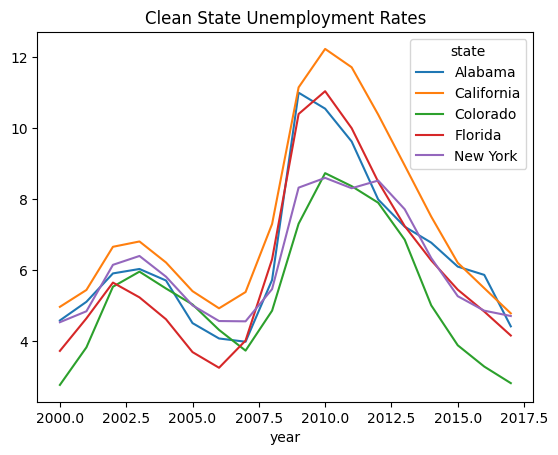

In [30]:
# Exercise 1c -- Steps 4 & 5
clean_state_unemp = yearly_state_unemp.droplevel(None, axis=1)
clean_state_unemp.plot(title='Clean State Unemployment Rates')

<Axes: title={'center': 'Yearly State Unemployment Rates'}, xlabel='year'>

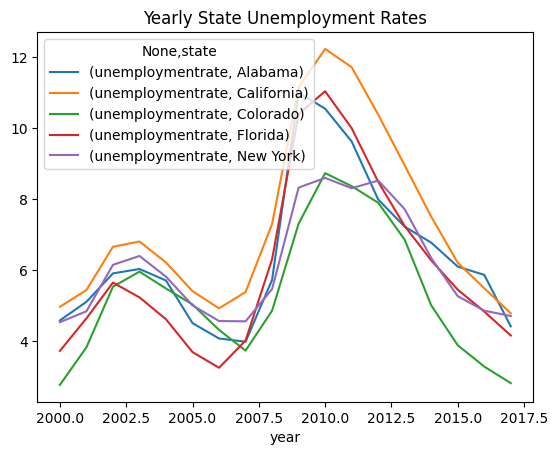

In [31]:
# Exercise 1c -- Step 6
yearly_state_unemp.plot(title='Yearly State Unemployment Rates')

### Response to Exercise 1c
The most salient real-world phenomenon visible in the plot is the trend of unemployment rates over the years for different states. You can observe periods of higher and lower unemployment rates, which might correlate with economic events such as recessions or booms.

Removing the unemploymentrate level simplified the plot by focusing directly on the state-wise unemployment rates over the years, making it easier to compare the trends across different states.

## Exercise 1d -- Using Lags to Plot Difference
Instead of plotting the unemployment rate average over time, we will plot the annual difference between unemployment rates over time for each state. To do this, complete the following steps:
1. Create a DataFrame called `shifted_unemp` and assign it to `clean_state_unemp` shifted by 1.
2. Create a DataFrame called `change_unemp` and assign it to the the difference between `clean_state_unemp` and `shifted_unemp` divided by `shifted_unemp`.
3. Call `.plot()` on `change_unemp`.

Answer the following questions in the markdown cell below.
1. Why is the year 2000 no longer being plotted? Look at the `change_unemp` DataFrame if you are unsure.
2. Which state saw the largest annual increase in unemployment during this period?

In [32]:
# Exercise 1d code
shifted_unemp = clean_state_unemp.shift(1)
change_unemp = (clean_state_unemp - shifted_unemp) / shifted_unemp

<Axes: title={'center': 'Annual Change in State Unemployment Rates'}, xlabel='year'>

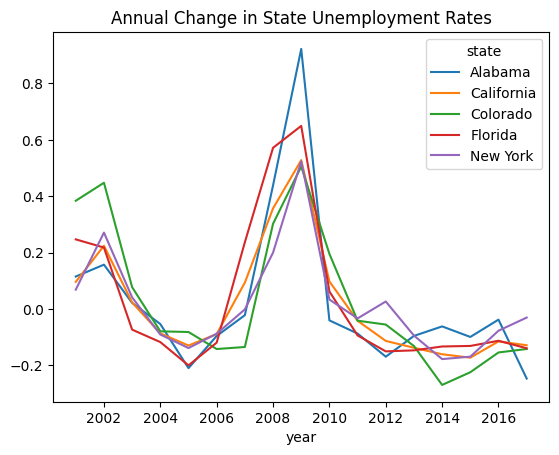

In [33]:
change_unemp.plot(title='Annual Change in State Unemployment Rates')

### Response to Exercise 1d
The year 2000 is no longer being plotted because when we calculate the annual difference, the first year (2000) does not have a previous year to compare against. As a result, the differences for the first year are NaN (Not a Number), which are not plotted.


## Exercise 2
In this question, we're going to look at data on daily Covid cases in British Columbia from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada). This data is broken down into five health regions:
- Fraser Health (Fraser)
- Interior Health (Interior)
- Northern Health (Northern)
- Vancouver Coastal Health (Vancouver Coastal)
- Vancouver Island Health Authority (Island)

You can see the geography of these regions below (Image from gov.bc.ca)

<img src = "https://www2.gov.bc.ca/assets/gov/health/managing-your-health/mental-health-substance-use/find-services-map-large.jpg"/>

In [34]:
pwd

'/content'

In [35]:
# Dowlonad the Data -- don't edit this cell
cases_bc = pd.read_csv("sample_data/data/covid_cases_bc.csv")
cases_bc.head()

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2,2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
3,2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
4,2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000


## Exercise 2a -- Checking the Data
`cases_bc` contains daily reported covid cases per hundred thousand people in BC for the year 2021. The data is broken down by health region. Before working with the data, you should learn how its structured and check it for potential errors. Answer the following questions in the first markdown cell below.
1. What is an observation (or row) in the dataset?
2. What is the index? Could we turn one of our variables into an index? Which one?
3. Does it make sense for any of the values in the table to be negative? Why or why not?

Now complete the following steps:
- Make it so the date is our index and check whether it is a `DateTimeIndex`. Afterwards, display `cases_bc` by making it the last line of the cell below.
- In the second cell, call `.dropna()` on cases_bc.
- In the third cell, us `.any()` and comparison operators **applied to `cases_bc`** to display all dates on which at least one of the health regions has a negative value. Call this DataFrame `neg_values`. Display `neg_values` by making it the last line of the cell. (**Hint**: Observe what happens when you use a comparison operator on a DataFrame. You can use the output to easily form an index for your DataFrame.)
- If any dates had a negative values, use comparison operators to set all negative values in `cases_bc` to `NaN`.


Answer the following Questions in the second Markdown cell.

4. Did dropping missing value change the DataFrame at all?
5. Did you find any negative values? If so, they have been turned into `NaN` values and will not be used in future analysis. What would be a possible alternative to this approach?


### Response to Exercise 2a Questions 1-3
An observation (or row) in the dataset represents the daily reported COVID-19 cases per hundred thousand people for each health region in British Columbia on a specific date.

The index in the dataset is currently the default integer index. We could turn the 'date' variable into an index since it uniquely identifies each observation.

No, it does not make sense for any of the values to be negative because the number of COVID-19 cases cannot be less than zero.

In [36]:
cases_bc.head()

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2,2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
3,2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
4,2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
non_numeric_entries = cases_bc.applymap(lambda x: isinstance(x, str))
non_numeric_entries_sum = non_numeric_entries.sum()

print(non_numeric_entries_sum)
print(cases_bc[non_numeric_entries.any(axis=1)])

date_report          365
Fraser                 0
Interior               0
Island                 0
Northern               0
Vancouver Coastal      0
dtype: int64
    date_report      Fraser   Interior     Island   Northern  \
0    2021-01-01    0.000000   0.000000   0.000000   0.000000   
1    2021-01-02   25.701861  24.589675   9.101332  33.213897   
2    2021-01-03   45.464436   9.935222  10.519722  39.252788   
3    2021-01-04   21.129137   7.203036   6.500952  17.110190   
4    2021-01-05    0.000000   0.000000   0.000000   0.000000   
..          ...         ...        ...        ...        ...   
360  2021-12-27   42.153154  36.387752  24.585417  17.781177   
361  2021-12-28   41.995474  33.282995  33.686749  13.755250   
362  2021-12-29   83.623027  46.447164  36.523528  33.213897   
363  2021-12-30  121.886737  62.219330  54.371594  40.930258   
364  2021-12-31  102.176722  39.740889  51.298417  43.278715   

     Vancouver Coastal  
0             0.000000  
1            24.19

In [38]:
# Exercise 2a -- Step 1
is_datetime_index = isinstance(cases_bc.index, pd.DatetimeIndex)
cases_bc, is_datetime_index

(    date_report      Fraser   Interior     Island   Northern  \
 0    2021-01-01    0.000000   0.000000   0.000000   0.000000   
 1    2021-01-02   25.701861  24.589675   9.101332  33.213897   
 2    2021-01-03   45.464436   9.935222  10.519722  39.252788   
 3    2021-01-04   21.129137   7.203036   6.500952  17.110190   
 4    2021-01-05    0.000000   0.000000   0.000000   0.000000   
 ..          ...         ...        ...        ...        ...   
 360  2021-12-27   42.153154  36.387752  24.585417  17.781177   
 361  2021-12-28   41.995474  33.282995  33.686749  13.755250   
 362  2021-12-29   83.623027  46.447164  36.523528  33.213897   
 363  2021-12-30  121.886737  62.219330  54.371594  40.930258   
 364  2021-12-31  102.176722  39.740889  51.298417  43.278715   
 
      Vancouver Coastal  
 0             0.000000  
 1            24.191511  
 2            26.815675  
 3            21.813363  
 4             0.000000  
 ..                 ...  
 360          28.865804  
 361      

In [39]:
# Exercise 2a -- Step 2
cases_bc = cases_bc.dropna()
cases_bc

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2,2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
3,2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
4,2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
360,2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
361,2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
362,2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926
363,2021-12-30,121.886737,62.219330,54.371594,40.930258,80.119006


In [40]:
# Exercise 2a -- Step 3
cases_bc = cases_bc.apply(pd.to_numeric, errors='coerce')
neg_values = cases_bc[(cases_bc < 0).any(axis=1)]
neg_values

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
157,NaN,0.525600,1.614474,0.236398,-0.670988,-1.312082
173,NaN,1.576801,5.091801,0.354597,-1.006482,1.066067
178,NaN,3.574083,2.235425,-0.590996,0.000000,3.936246
180,NaN,0.893521,1.738664,0.118199,-0.335494,0.984061


In [41]:
# Exercise 2a -- Step 4
cases_bc[cases_bc < 0] = pd.NA
cases_bc

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,25.701861,24.589675,9.101332,33.213897,24.191511
2,NaN,45.464436,9.935222,10.519722,39.252788,26.815675
3,NaN,21.129137,7.203036,6.500952,17.110190,21.813363
4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
360,NaN,42.153154,36.387752,24.585417,17.781177,28.865804
361,NaN,41.995474,33.282995,33.686749,13.755250,32.966060
362,NaN,83.623027,46.447164,36.523528,33.213897,46.824926
363,NaN,121.886737,62.219330,54.371594,40.930258,80.119006


### Response to Exercise 2a 4-5
Dropping missing values may not change the DataFrame if there were no missing values to begin with.

Yes, negative values were found and have been turned into NaN values. An alternative approach could be to replace negative values with zero or impute them with the mean or median of the respective health region's values.

## Exercise 2b -- Aggregations
Using aggregators with the axis argument, complete the following steps:
1. At each date, find the minimum number of cases per 100,000 across health regions. Print the top 3 rows of the resulting series.
2. For each health region, what was the median number of daily cases per 100,000 in 2021. Print the resulting series. (**Hint:** Think about how long should this series be.)
3. What the maximum number of daily cases per 100,000 across all health regions? Which health region did this maximum occur in? What day was the maximum attained?

**Hint:** For the last step, you might need to aggregate twice. You may also want to use the aggregator `.idxmax()` which returns the index of the maximum value.

In [42]:
# Exercise 2b -- Step 1
cases_bc = cases_bc.apply(pd.to_numeric, errors='coerce')
min_cases_per_date = cases_bc.min(axis=1)
print("Top 3 rows of minimum cases per date:")
print(min_cases_per_date.head(3))

Top 3 rows of minimum cases per date:
0    0.000000
1    9.101332
2    9.935222
dtype: float64


In [43]:
# Exercise 2b -- Step 2
median_cases_per_region = cases_bc.median(axis=0)
print("Median cases per region:")
print(median_cases_per_region)

Median cases per region:
date_report               NaN
Fraser               8.567287
Interior             6.582085
Island               2.482181
Northern             8.219601
Vancouver Coastal    5.576348
dtype: float64


In [44]:
max_cases = cases_bc.max().max()
print(f"Maximum number of daily cases per 100,000 across all health regions: {max_cases}")

Maximum number of daily cases per 100,000 across all health regions: 136.2105291410014


In [45]:
max_region = cases_bc.max().idxmax()
print(f"Health region with the maximum number of cases: {max_region}")

Health region with the maximum number of cases: Northern


In [46]:
max_date = cases_bc[cases_bc == max_cases].dropna(how='all').index[0]
print(f"Date when the maximum number of cases occurred: {max_date}")

Date when the maximum number of cases occurred: 290


## Exercise 2c -- Classifying Variance
Averages and medians communicate some notion of the statistical center of data. Similarly, the sample variance of data gives us some sense of how dispersed the data is around that center. A low variance means the data is relatively concentrated whereas a high variance means the data is relatively dispersed. The sample variance of a column of data $x$ can be given by the following equation
$$
var(x) = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2
$$
where $n$ is the nimber of elements in $x$, $\bar{x}$ is the average of $x$, and $x_i$ is a single element in $x$. Complete the following steps:
1.  The method DataFrame and Series method `.var()` will automatically calculate the variance of each column or row in a DataFrame. Use `.var()` to calculate the variance in the daily cases per 100,000 for each health region in 2021. Name this DataFrame `hr_var`.
2. Currently,  `hr_var` has a single column indexed by the integer 0. Rename this column so it is called "s_var".
3. Using a list comprehension, create a new column in `hr_var` called "classification" which is equal to
    - "High" if the variance for a health region is strictly greater than 300,  
    - "Medium" if the variance for a health region is strictly greater than 150 and less than or equal to 300
    - "Low" if the variance for a health region is less than or equal to 150.
    
4. Display the resulting DataFrame by having `hr_var` as your last line in the cell.
5. In the second cell, use `cases_bc`, indexing, and `.plot()` to plot the daily cases per 100,000 for the Northern and Island health regions.

Finally, in the Markdown cell below **answer the following question**. What are the classifications for the Northern and Island regions. What features of the two lines you plotted reflect these classifications?


**Hint:** For step 3, you will want to use a nested if else statements within the list comprehension.

In [47]:
# Exercise 2c -- Steps 1-4
hr_var = cases_bc.var().to_frame()
hr_var.columns = ['s_var']
print(hr_var)

                        s_var
date_report               NaN
Fraser             325.974643
Interior           248.630355
Island              70.464125
Northern           492.035072
Vancouver Coastal  193.452989


In [48]:
hr_var['classification'] = [
    "High" if var > 300
    else
    "Medium" if 150 < var <= 300
    else
    "Low" for var in hr_var['s_var']
]
print(hr_var)

                        s_var classification
date_report               NaN            Low
Fraser             325.974643           High
Interior           248.630355         Medium
Island              70.464125            Low
Northern           492.035072           High
Vancouver Coastal  193.452989         Medium


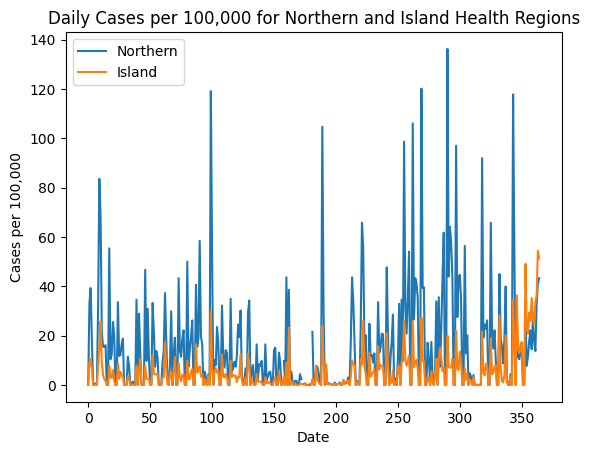

In [49]:
# Exercise 2c -- Step 5
import matplotlib.pyplot as plt
cases_bc[['Northern', 'Island']].plot()
plt.title('Daily Cases per 100,000 for Northern and Island Health Regions')
plt.xlabel('Date')
plt.ylabel('Cases per 100,000')
plt.legend(['Northern', 'Island'])
plt.show()

### Response to Exercise 2c
To determine the classifications for the Northern and Island regions, refer to the hr_var DataFrame, which includes the "classification" column.

The plot for each region visually reflects its variance classification: more volatile regions will have more erratic and fluctuating lines, while less volatile regions will show more consistent trends.

## Exerice 2d -- More Classifying & `.applymap()`
Now, we want to determine whether the cases per 100,000 on a given day was "High" ($> 10$), "Low"($\leq 10$ and $>0$), or "None" ($=0$) for each region-day. To do this, complete the following steps:
1. Define a function called `classify_cases` that takes a **single number** and returns a "High", "Low" or "None" according to the criteria aboce
2. `.applymap()` takes a function of a single value and applies that function to each cell in a DataFrame  individuall. Using `classify_cases` and `.applymap`, create a DataFrame that has a classification for each region-day. Call this DataFrame `cases_bins`.
3. Print the top 5 rows of that DataFratme.

In [50]:
# Exercise 2d code
def classify_cases(x):
    if x > 10:
        return "High"
    elif x > 0:
        return "Low"
    else:
        return "None"

In [51]:
cases_bins = cases_bc.applymap(classify_cases)
print(cases_bins.head(5))

  date_report Fraser Interior Island Northern Vancouver Coastal
0        None   None     None   None     None              None
1        None   High     High    Low     High              High
2        None   High      Low   High     High              High
3        None   High      Low    Low     High              High
4        None   None     None   None     None              None


### Exercise 2e -- Classification Count
Next, we want to count how many days of each type ("High", "Low", and "None") each helth region had on 2021. Complete the following steps:
1. Using `pd.value_counts` and `.apply()`, create DataFrame called `class_counts` where the row indices are the three classes and the columns are health regions.
2. Using the DataFrame method `.barh()`, create a horizontal bar plot where there are five groups of three bars.

**Hint:** You may have to use `.T` to get the right bar chart.

In [52]:
# Exercise 2e code
cases_bins = cases_bc.applymap(classify_cases)

In [53]:
class_counts = cases_bins.apply(pd.value_counts).fillna(0)
print(class_counts)

      date_report  Fraser  Interior  Island  Northern  Vancouver Coastal
High          0.0     171       144      58       171                117
Low           0.0      84       108     194        75                137
None        365.0     110       113     113       119                111


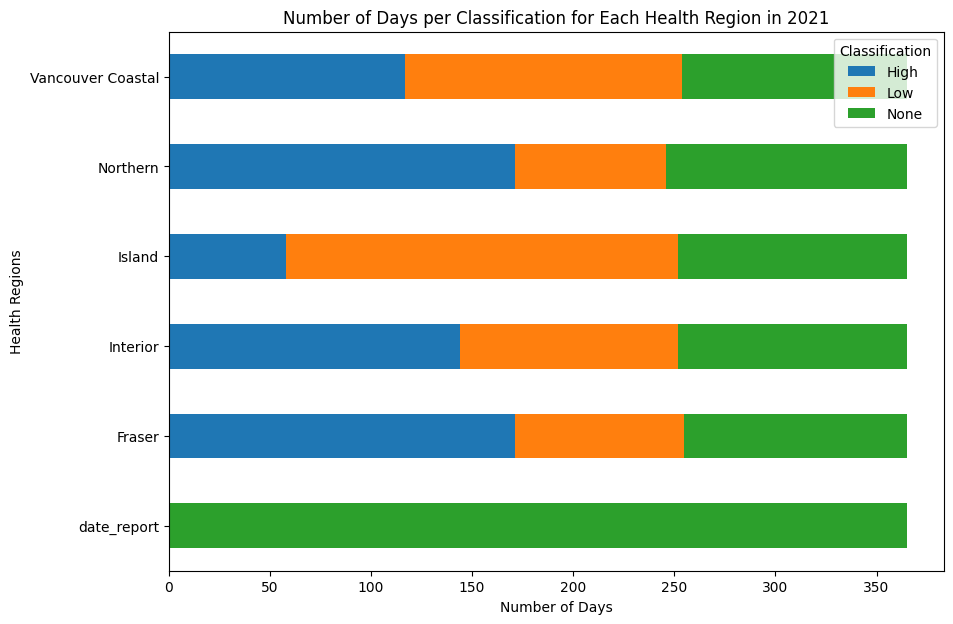

In [54]:
class_counts.T.plot(kind='barh', stacked=True, figsize=(10, 7))
plt.xlabel('Number of Days')
plt.ylabel('Health Regions')
plt.title('Number of Days per Classification for Each Health Region in 2021')
plt.legend(title='Classification')
plt.show()

### Exercise 2f -- Choose Your Health Region
Choose one of the five health regions. Complete the following steps to find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".
1. Using `pd.concat()` `cases_bc`, and `cases_bin`, create a DataFrame with two columns called `my_health_region`. The first column should be titled "cases" and include the number of cases per 100,000 in your chosen health region for each day. The second column should be titled "class" and include the classification for that health region in each day.
2. Using `.groupby()` and an aggregator, find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".

In [56]:
# Exercise 2f code
region = 'Northern'
my_health_region = pd.concat([
    cases_bc[[region]].rename(columns={region: 'cases'}),
    cases_bins[[region]].rename(columns={region: 'class'})
], axis=1)
print(my_health_region.head())

       cases class
0   0.000000  None
1  33.213897  High
2  39.252788  High
3  17.110190  High
4   0.000000  None


In [58]:
average_cases = my_health_region.groupby('class')['cases'].mean()
print(average_cases)

class
High    31.457950
Low      4.383787
None     0.000000
Name: cases, dtype: float64
